# Classificação de Iris - Aprendizado de Máquina | Machine Learning

O conjunto de dados flor Iris consiste em 50 amostras de cada uma das três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor). O conjunto de dados contém 150 linhas e 5 colunas: Comprimento da sépala (sepal_length) em cm, Largura da sépala (sepal_width), Comprimento da pétala (petal_length) em cm, Largura da pétala (petal_width) em cm e Espécies (species).

1. sepal length - comprimento da sépala em cm
2. sepal width - largura da sépala em cm
3. petal length - comprimento da pétala em cm
4. petal width - largura da pétala em cm
5. species: setosa, versicolor e virginica


Algoritmos de aprendizado de máquina (machine learning) usados:
- Regressão Logística | Logistic Regression
- K-vizinhos Mais Próximos | K-Nearest Neighbors | KNN
- Árvore de Decisão | Decision Tree
- Máquina de Vetores de Suporte | Support Vector Machine | SVM

Rede Neural (Neural Network):
- Perceptron multicamadas | Multi-layer Perceptron | MLP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Não há valores missing.

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Distribuição das espécies

print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


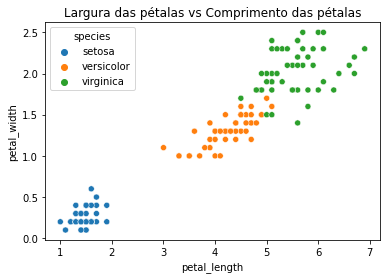

In [8]:
# Gráfico de dispersão - Largura das pétalas vs Comprimento das pétalas - petal_length vs petal_width

sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')
plt.title('Largura das pétalas vs Comprimento das pétalas')
plt.show()

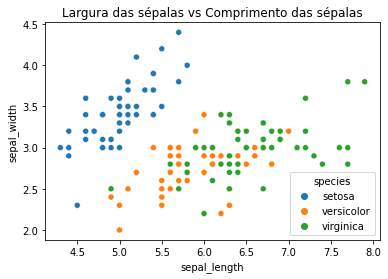

In [9]:
# Gráfico de dispersão - Largura das sépalas vs Comprimento das sépalas - sepal_width vs sepal_length

sns.scatterplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')
plt.title('Largura das sépalas vs Comprimento das sépalas')
plt.show()

#### O mínimo e o máximo das medidas da espécie setosa:

In [10]:
setosa_min = pd.DataFrame(iris[iris.species == 'setosa'].min(), columns = ['Mínimo'])[0:4]
setosa_max = pd.DataFrame(iris[iris.species == 'setosa'].max(), columns = ['Máximo'])[0:4]
pd.concat([setosa_min, setosa_max], axis = 1)

,Mínimo,Máximo
sepal_length,4.3,5.8
sepal_width,2.3,4.4
petal_length,1.0,1.9
petal_width,0.1,0.6


#### O mínimo e o máximo das medidas da espécie versicolor:

In [11]:
versicolor_min = pd.DataFrame(iris[iris.species == 'versicolor'].min(), columns = ['Mínimo'])[0:4]
versicolor_max = pd.DataFrame(iris[iris.species == 'versicolor'].max(), columns = ['Máximo'])[0:4]
pd.concat([versicolor_min, versicolor_max], axis = 1)

,Mínimo,Máximo
sepal_length,4.9,7.0
sepal_width,2.0,3.4
petal_length,3.0,5.1
petal_width,1.0,1.8


#### O mínimo e o máximo das medidas da espécie virginica:

In [12]:
virginica_min = pd.DataFrame(iris[iris.species == 'virginica'].min(), columns = ['Mínimo'])[0:4]
virginica_max = pd.DataFrame(iris[iris.species == 'virginica'].max(), columns = ['Máximo'])[0:4]
pd.concat([virginica_min, virginica_max], axis = 1)

,Mínimo,Máximo
sepal_length,4.9,7.9
sepal_width,2.2,3.8
petal_length,4.5,6.9
petal_width,1.4,2.5


#### Relações em pares

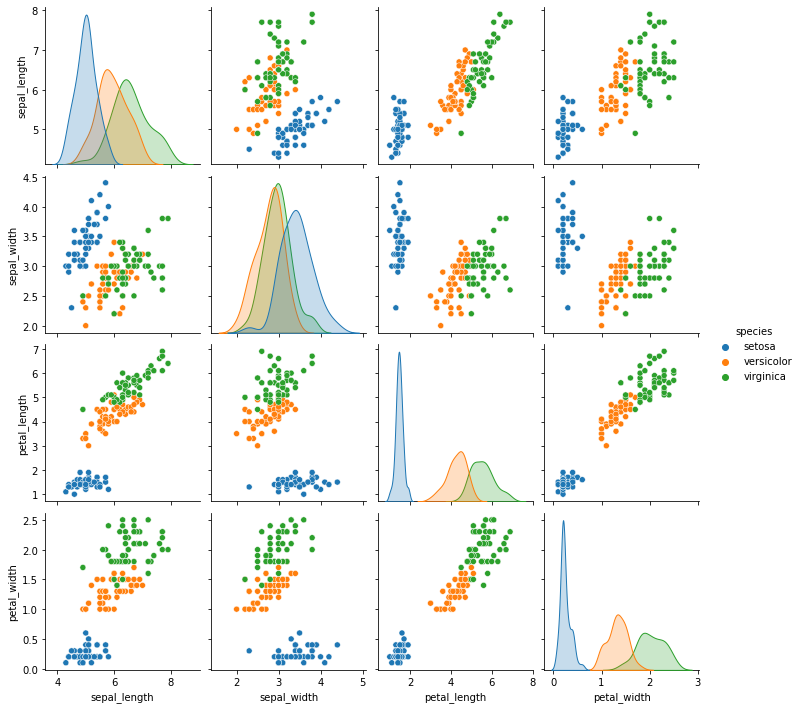

In [13]:
sns.pairplot(iris, hue = 'species')

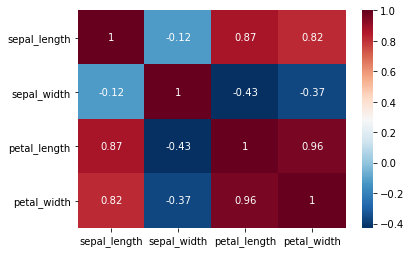

In [14]:
sns.heatmap(iris.corr(), annot =True, cmap="RdBu_r")
plt.show()

#### Transformando a coluna 'species' do conjunto de dados

In [15]:
transform = {'setosa': 1, 'versicolor': 2, 'virginica': 3}
iris['species'] = iris['species'].map(transform)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


Transformações:
- 1 = setosa 
- 2 = versicolor 
- 3 = virginica

#### Divisão de treino e teste

In [16]:
x = iris.drop('species', axis=1)
y = iris['species']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [18]:
print(f'x treino: {x_train.shape}')
print(f'x teste: {x_test.shape}')

x treino: (105, 4)
x teste: (45, 4)


# Regressão Logística | Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


rl = LogisticRegression()

rl_fit = rl.fit(x_train, y_train)
rl_pred = rl_fit.predict(x_test)

In [20]:
print('Regressão Logística - Acurácia de Treino: {}'.format(rl.score(x_train, y_train)))
print('Regressão Logística - Acurácia de Teste: {}'.format(rl.score(x_test, y_test)))

Regressão Logística - Acurácia de Treino: 0.9809523809523809
Regressão Logística - Acurácia de Teste: 0.9777777777777777


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rl_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        18
           3       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [22]:
from sklearn.metrics import confusion_matrix

print('Matriz de Confusão - Regressão Logística:')

# confusion_matrix(y_test, rl_pred)
rl_confusion_matrix= pd.DataFrame(metrics.confusion_matrix(y_test, rl_pred, labels=[1,2,3]),
            columns = ['setosa_predito', 'versicolor_predito', 'virginica_predito'],
            index=['setosa_real', 'versicolor_real', 'virginica_real'])

rl_confusion_matrix

Matriz de Confusão - Regressão Logística:


,setosa_predito,versicolor_predito,virginica_predito
setosa_real,14,0,0
versicolor_real,0,17,1
virginica_real,0,0,13


# K-Nearest Neighbors | KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn_fit = knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [24]:
print('KNN - Acurácia de Treino: {}'.format(knn.score(x_train, y_train)))
print('KNN - Acurácia de Teste: {}'.format(knn.score(x_test, y_test)))

KNN - Acurácia de Treino: 0.9523809523809523
KNN - Acurácia de Teste: 0.9777777777777777


In [25]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.95      1.00      0.97        18
           3       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [26]:
print('Matriz de Confusão - KNN:')

# confusion_matrix(y_test, knn_pred)
knn_confusion_matrix= pd.DataFrame(metrics.confusion_matrix(y_test, knn_pred, labels=[1,2,3]),
            columns = ['setosa_predito', 'versicolor_predito', 'virginica_predito'],
            index=['setosa_real', 'versicolor_real', 'virginica_real'])

knn_confusion_matrix

Matriz de Confusão - KNN:


,setosa_predito,versicolor_predito,virginica_predito
setosa_real,14,0,0
versicolor_real,0,18,0
virginica_real,0,1,12


# Árvore de Decisão | Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)

In [28]:
print('Decision Tree - Acurácia de Treino: {}'.format(dt.score(x_train, y_train)))
print('Decision Tree - Acurácia de Teste: {}'.format(dt.score(x_test, y_test)))

Decision Tree - Acurácia de Treino: 1.0
Decision Tree - Acurácia de Teste: 0.9555555555555556


In [29]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.94      0.94      0.94        18
           3       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [30]:
print('Matriz de Confusão - Decision Tree:')

# confusion_matrix(y_test, knn_pred)
dt_confusion_matrix= pd.DataFrame(metrics.confusion_matrix(y_test, dt_pred, labels=[1,2,3]),
            columns = ['setosa_predito', 'versicolor_predito', 'virginica_predito'],
            index=['setosa_real', 'versicolor_real', 'virginica_real'])

dt_confusion_matrix

Matriz de Confusão - Decision Tree:


,setosa_predito,versicolor_predito,virginica_predito
setosa_real,14,0,0
versicolor_real,0,17,1
virginica_real,0,1,12


# Support Vector Machine | SVM

In [31]:
from sklearn import svm

svm = svm.SVC(kernel='linear', C=1)

svm_fit = svm.fit(x_train, y_train)
svm_pred = svm_fit.predict(x_test)

In [32]:
print('SVM - Acurácia de Treino: {}'.format(svm.score(x_train, y_train)))
print('SVM - Acurácia de Teste: {}'.format(svm.score(x_test, y_test)))

SVM - Acurácia de Treino: 0.9809523809523809
SVM - Acurácia de Teste: 1.0


In [33]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [34]:
print('Matriz de Confusão - SVM:')

# confusion_matrix(y_test, knn_pred)
svm_confusion_matrix= pd.DataFrame(metrics.confusion_matrix(y_test, svm_pred, labels=[1,2,3]),
            columns = ['setosa_predito', 'versicolor_predito', 'virginica_predito'],
            index=['setosa_real', 'versicolor_real', 'virginica_real'])

svm_confusion_matrix

Matriz de Confusão - SVM:


,setosa_predito,versicolor_predito,virginica_predito
setosa_real,14,0,0
versicolor_real,0,18,0
virginica_real,0,0,13


# Multi-layer Perceptron | MLP - Rede Neural | Neural Network

In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)

mlp_fit = mlp.fit(x_train, y_train)
mlp_pred = mlp_fit.predict(x_test)

In [36]:
print('MLP - Acurácia de Treino: {}'.format(mlp.score(x_train, y_train)))
print('MLP - Acurácia de Teste: {}'.format(mlp.score(x_test, y_test)))

MLP - Acurácia de Treino: 0.9809523809523809
MLP - Acurácia de Teste: 1.0


In [37]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [38]:
print('Matriz de Confusão - MLP:')

mlp_confusion_matrix= pd.DataFrame(metrics.confusion_matrix(y_test, mlp_pred, labels=[1,2,3]),
            columns = ['setosa_predito', 'versicolor_predito', 'virginica_predito'],
            index=['setosa_real', 'versicolor_real', 'virginica_real'])

mlp_confusion_matrix

Matriz de Confusão - MLP:


,setosa_predito,versicolor_predito,virginica_predito
setosa_real,14,0,0
versicolor_real,0,18,0
virginica_real,0,0,13


# Geral

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

rl_ac = accuracy_score(y_test, rl_pred)
rl_sen = recall_score(y_test, rl_pred, average="weighted")
rl_pre = precision_score(y_test, rl_pred, average="weighted")
rl_f1 = f1_score(y_test, rl_pred, average="weighted")

print('------ Regressão Logística ------')
print("Accuracy    : ", rl_ac)
print("Recall      : ", rl_sen)
print("Precision   : ", rl_pre)
print("F1 Score    : ", rl_f1)


knn_ac = accuracy_score(y_test, knn_pred)
knn_sen = recall_score(y_test, knn_pred, average="weighted")
knn_pre = precision_score(y_test, knn_pred, average="weighted")
knn_f1 = f1_score(y_test, knn_pred, average="weighted")

print('\n-------------- KNN --------------')
print("Accuracy    : ", knn_ac)
print("Recall      : ", knn_sen)
print("Precision   : ", knn_pre)
print("F1 Score    : ", knn_f1)


dt_ac = accuracy_score(y_test, dt_pred)
dt_sen = recall_score(y_test, dt_pred, average="weighted")
dt_pre = precision_score(y_test, dt_pred, average="weighted")
dt_f1 = f1_score(y_test, dt_pred, average="weighted")

print('\n--------- Decision Tree ---------')
print("Accuracy    : ", dt_ac)
print("Recall      : ", dt_sen)
print("Precision   : ", dt_pre)
print("F1 Score    : ", dt_f1)


svm_ac = accuracy_score(y_test, svm_pred)
svm_sen = recall_score(y_test, svm_pred, average="weighted")
svm_pre = precision_score(y_test, svm_pred, average="weighted")
svm_f1 = f1_score(y_test, svm_pred, average="weighted")

print('\n------- SVM -------')
print("Accuracy    : ", svm_ac)
print("Recall      : ", svm_sen)
print("Precision   : ", svm_pre)
print("F1 Score    : ", svm_f1)


mlp_ac = accuracy_score(y_test, mlp_pred)
mlp_sen = recall_score(y_test, mlp_pred, average="weighted")
mlp_pre = precision_score(y_test, mlp_pred, average="weighted")
mlp_f1 = f1_score(y_test, mlp_pred, average="weighted")

print('\n------- MLP -------')
print("Accuracy    : ", mlp_ac)
print("Recall      : ", mlp_sen)
print("Precision   : ", mlp_pre)
print("F1 Score    : ", mlp_f1)

------ Regressão Logística ------
Accuracy    :  0.9777777777777777
Recall      :  0.9777777777777777
Precision   :  0.9793650793650793
F1 Score    :  0.9778718400940623

-------------- KNN --------------
Accuracy    :  0.9777777777777777
Recall      :  0.9777777777777777
Precision   :  0.9789473684210527
F1 Score    :  0.9776336336336338

--------- Decision Tree ---------
Accuracy    :  0.9555555555555556
Recall      :  0.9555555555555556
Precision   :  0.9555555555555556
F1 Score    :  0.9555555555555556

------- SVM -------
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0

------- MLP -------
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0


# Visualização Gráfica das Previsões

Foi adicionada uma previsão de um modelo a cada gráfico para facilitar a compreensão.

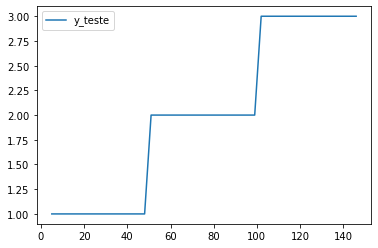

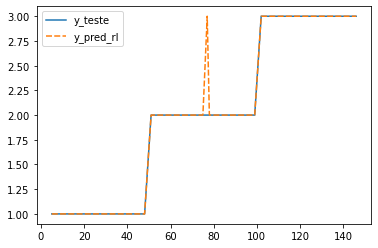

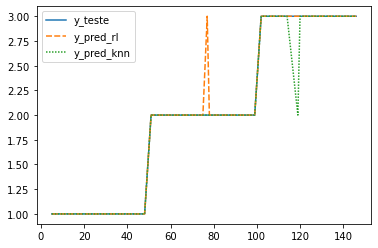

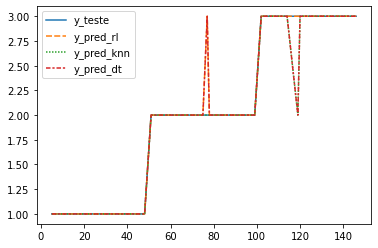

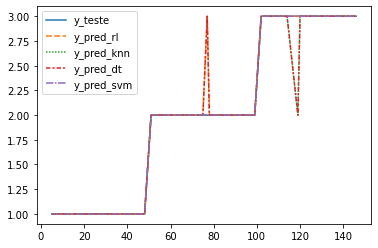

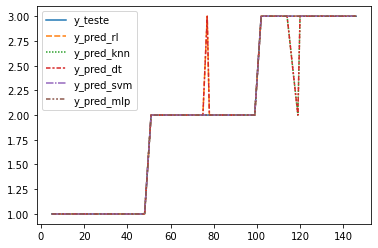

In [40]:
df_resultado = pd.DataFrame()

df_resultado['y_teste'] = y_test
sns.lineplot(data=df_resultado)
plt.show()

df_resultado['y_pred_rl'] = rl_pred
sns.lineplot(data=df_resultado)
plt.show()

df_resultado['y_pred_knn'] = knn_pred
sns.lineplot(data=df_resultado)
plt.show()

df_resultado['y_pred_dt'] = dt_pred
sns.lineplot(data=df_resultado)
plt.show()

df_resultado['y_pred_svm'] = svm_pred
sns.lineplot(data=df_resultado)
plt.show()

df_resultado['y_pred_mlp'] = mlp_pred
sns.lineplot(data=df_resultado)
plt.show()

In [41]:
display(df_resultado)

,y_teste,y_pred_rl,y_pred_knn,y_pred_dt,y_pred_svm,y_pred_mlp
14,1,1,1,1,1,1
98,2,2,2,2,2,2
75,2,2,2,2,2,2
16,1,1,1,1,1,1
131,3,3,3,3,3,3
56,2,2,2,2,2,2
141,3,3,3,3,3,3
44,1,1,1,1,1,1
29,1,1,1,1,1,1
120,3,3,3,3,3,3
